In [1]:

from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
data_path = Path(os.getcwd()) # perhaps set to external harddrive to accomodate large amount of data
path = data_path / 'stock price data'/"company stock price daily"/'AAPL.csv'
stock = pd.read_csv(path) 
stock

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Symbol
0,2023-07-11,189.1600,189.3000,186.6000,188.0800,188.080002,46522493,46509718,-1.0800,-0.57095,187.82,"July 11, 23",-0.005710,AAPL
1,2023-07-10,189.2600,189.9900,187.0350,188.6100,188.610001,59912163,59922200,-0.6500,-0.34344,188.36,"July 10, 23",-0.003434,AAPL
2,2023-07-07,191.4100,192.6700,190.2400,190.6800,190.679993,46757498,46778000,-0.7300,-0.38138,191.42,"July 07, 23",-0.003814,AAPL
3,2023-07-06,189.8400,192.0200,189.2000,191.8100,191.809998,45155523,45094300,1.9700,1.04000,190.82,"July 06, 23",0.010400,AAPL
4,2023-07-05,191.5650,192.9800,190.6200,191.3300,191.330002,46896861,46920300,-0.2350,-0.12267,191.58,"July 05, 23",-0.001227,AAPL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,2010-01-08,7.5107,7.5714,7.4664,7.5707,6.434673,447872124,15995433,0.0600,0.79886,7.53,"January 08, 10",0.007989,AAPL
3398,2010-01-07,7.5625,7.5714,7.4661,7.5207,6.392176,477129296,17040332,-0.0418,-0.55273,7.51,"January 07, 10",-0.005527,AAPL
3399,2010-01-06,7.6564,7.6868,7.5268,7.5346,6.404015,552158376,19719942,-0.1218,-1.59000,7.61,"January 06, 10",-0.015900,AAPL
3400,2010-01-05,7.6643,7.6996,7.6161,7.6564,6.507526,601901216,21496472,-0.0079,-0.10308,7.67,"January 05, 10",-0.001031,AAPL


In [3]:
order = [0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1,1,0,0,0,0,0]

In [4]:
stock = stock.sort_values(by='date').reset_index(drop=True)
n=len(stock)
# Calculate the number of complete cycles (each cycle contains 20 elements: 10 zeros, 10 ones or negative ones)
num_cycles = n // len(order)

# Calculate the remainder if 'n' is not a multiple of 20
remainder = n % len(order)

# Repeat the pattern for the number of complete cycles
result = order*num_cycles

# Append additional zeros based on the remainder
result = np.concatenate((result, [0] * remainder))

stock['order'] = result
stock['date'] = pd.to_datetime(stock['date'])
stock

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,Symbol,order
0,2010-01-04,7.6225,7.6607,7.5850,7.6432,6.496293,493719800,17632850,0.0207,0.27156,7.63,"January 04, 10",0.002716,AAPL,0
1,2010-01-05,7.6643,7.6996,7.6161,7.6564,6.507526,601901216,21496472,-0.0079,-0.10308,7.67,"January 05, 10",-0.001031,AAPL,0
2,2010-01-06,7.6564,7.6868,7.5268,7.5346,6.404015,552158376,19719942,-0.1218,-1.59000,7.61,"January 06, 10",-0.015900,AAPL,0
3,2010-01-07,7.5625,7.5714,7.4661,7.5207,6.392176,477129296,17040332,-0.0418,-0.55273,7.51,"January 07, 10",-0.005527,AAPL,0
4,2010-01-08,7.5107,7.5714,7.4664,7.5707,6.434673,447872124,15995433,0.0600,0.79886,7.53,"January 08, 10",0.007989,AAPL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3397,2023-07-05,191.5650,192.9800,190.6200,191.3300,191.330002,46896861,46920300,-0.2350,-0.12267,191.58,"July 05, 23",-0.001227,AAPL,0
3398,2023-07-06,189.8400,192.0200,189.2000,191.8100,191.809998,45155523,45094300,1.9700,1.04000,190.82,"July 06, 23",0.010400,AAPL,0
3399,2023-07-07,191.4100,192.6700,190.2400,190.6800,190.679993,46757498,46778000,-0.7300,-0.38138,191.42,"July 07, 23",-0.003814,AAPL,0
3400,2023-07-10,189.2600,189.9900,187.0350,188.6100,188.610001,59912163,59922200,-0.6500,-0.34344,188.36,"July 10, 23",-0.003434,AAPL,0


In [5]:
buy_orders = []
sell_orders = []
current_order = None
money = 100000
short = None
long=None

for index, row in stock.iterrows():
    if row['order'] > 0:
        if current_order is None and short is None:
            current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': stock.loc[index - 1, 'close'], "Shares Purchased": money/stock.loc[index - 1, 'close'], "long/short":"long"}
            long=True
        elif current_order is not None and short is not None:
            current_order['Sell Date'] = row['date']
            current_order['Sell Price'] = row['close']
            current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
            current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"] * -1
            current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
            money = current_order["Money After Order"]
            sell_orders.append(current_order)
            short = None
            current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': row['close'], "Shares Purchased": money/row['close'], "long/short":"long"}
            long = True
        else:
            continue
    elif row['order'] < 0:
        if current_order is None and long is None:
            current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': stock.loc[index - 1, 'close'], "Shares Purchased": money/stock.loc[index - 1, 'close'], "long/short": "short"}
            short=True
        elif current_order is not None and long is not None:
            current_order['Sell Date'] = row['date']
            current_order['Sell Price'] = row['close']
            current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
            current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"]
            current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
            money = current_order["Money After Order"]
            sell_orders.append(current_order)
            long = None
            current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': row['close'], "Shares Purchased": money/row['close'], "long/short": "short"}
            short = True
        else:
            continue
    elif row['order'] == 0:
        if current_order is not None:
            current_order['Sell Date'] = row['date']
            current_order['Sell Price'] = row['close']
            current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
            if current_order['long/short']=="short":
                current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"] * -1
            elif current_order['long/short']=="long":
                current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"]
            current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
            money = current_order["Money After Order"]
            sell_orders.append(current_order)
            current_order = None
            long = None
            short = None

# Create a new DataFrame for buy and sell orders
orders_df = pd.DataFrame(buy_orders + sell_orders)

# Reset the index of the new DataFrame
orders_df.reset_index(drop=True, inplace=True)
# Print the new DataFrame with buy and sell orders
orders_df

,Initial Money,Buy Date,Buy Price,Shares Purchased,long/short,Sell Date,Sell Price,Price Change,Profit,Money After Order
0,100000.000000,2010-01-11,7.5707,13208.818207,long,2010-01-26,7.3550,-0.2157,-2849.142087,97150.857913
1,97150.857913,2010-02-02,6.9546,13969.294843,short,2010-02-17,7.2339,0.2793,-3901.624050,93249.233863
2,93249.233863,2010-02-24,7.0378,13249.770363,short,2010-03-09,7.9650,0.9272,-12285.187081,80964.046782
3,80964.046782,2010-03-09,7.9650,10164.977625,long,2010-03-22,8.0268,0.0618,628.195617,81592.242400
4,81592.242400,2010-04-06,8.5175,9579.365119,long,2010-04-20,8.7354,0.2179,2087.343659,83679.586059
...,...,...,...,...,...,...,...,...,...,...
227,18771.668578,2023-02-01,145.4300,129.077003,long,2023-02-14,153.2000,7.7700,1002.928315,19774.596893
228,19774.596893,2023-03-01,147.4100,134.146916,long,2023-03-15,152.9900,5.5800,748.539791,20523.136685
229,20523.136685,2023-03-22,159.2800,128.849427,short,2023-04-05,163.7600,4.4800,-577.245432,19945.891253
230,19945.891253,2023-04-13,160.1000,124.583955,short,2023-04-26,163.7600,3.6600,-455.977277,19489.913976


In [5]:
def eval(stock):
    buy_orders = []
    sell_orders = []
    current_order = None
    money = 100000
    short = None
    long=None

    for index, row in stock.iterrows():
        if row['order'] > 0:
            if current_order is None and short is None:
                current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': stock.loc[index - 1, 'close'], "Shares Purchased": money/stock.loc[index - 1, 'close'], "long/short":"long"}
                long=True
            elif current_order is not None and short is not None:
                current_order['Sell Date'] = row['date']
                current_order['Sell Price'] = row['close']
                current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
                current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"] * -1
                current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
                money = current_order["Money After Order"]
                sell_orders.append(current_order)
                short = None
                current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': row['close'], "Shares Purchased": money/row['close'], "long/short":"long"}
                long = True
            else:
                continue
        elif row['order'] < 0:
            if current_order is None and long is None:
                current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': stock.loc[index - 1, 'close'], "Shares Purchased": money/stock.loc[index - 1, 'close'], "long/short": "short"}
                short=True
            elif current_order is not None and long is not None:
                current_order['Sell Date'] = row['date']
                current_order['Sell Price'] = row['close']
                current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
                current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"]
                current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
                money = current_order["Money After Order"]
                sell_orders.append(current_order)
                long = None
                current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': row['close'], "Shares Purchased": money/row['close'], "long/short": "short"}
                short = True
            else:
                continue
        elif row['order'] == 0:
            if current_order is not None:
                current_order['Sell Date'] = row['date']
                current_order['Sell Price'] = row['close']
                current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
                if current_order['long/short']=="short":
                    current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"] * -1
                elif current_order['long/short']=="long":
                    current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"]
                current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
                money = current_order["Money After Order"]
                sell_orders.append(current_order)
                current_order = None
                long = None
                short = None

    # Create a new DataFrame for buy and sell orders
    orders_df = pd.DataFrame(buy_orders + sell_orders)

    # Reset the index of the new DataFrame
    orders_df.reset_index(drop=True, inplace=True)  
    #Total Trades
    print("Total Trades: {}".format(len(orders_df)))

    #Average Win
    winning = orders_df[orders_df["Profit"] > 0]
    print(f"Average Win: {abs(winning['Price Change']/winning['Buy Price']).mean() * 100:.2f}%")

    #Average Lose
    losing = orders_df[orders_df["Profit"] <= 0]
    print(f"Average Lose: {abs(losing['Price Change']/losing['Buy Price']).mean() * 100:.2f}%")

    #maximum drawdown
    peak_value = None
    maximum_drawdown = 0.0

    for index, row in stock.iterrows():
        if row['order'] == 1:
            if peak_value is None:
                peak_value = row['close']
            elif row['close'] > peak_value:
                peak_value = row['close']
            else:
                drawdown = (peak_value - row['close']) / peak_value
                if drawdown > maximum_drawdown:
                    maximum_drawdown = drawdown
        if row['order'] == -1:
            if peak_value is None:
                peak_value = row['close']
            elif row['close'] < peak_value:
                peak_value = row['close']
            else:
                drawdown = (row['close'] - peak_value) / peak_value
                if drawdown > maximum_drawdown:
                    maximum_drawdown = drawdown
        elif row['order'] == 0:
            # If 'order_column' is 0, reset peak and trough values
            peak_value = None

    # Maximum Drawdown is now stored in 'maximum_drawdown'
    print(f"Maximum Drawdown: {maximum_drawdown * 100:.2f}%")

    #ROI
    ROI = (orders_df.loc[len(orders_df)-1, "Money After Order"] - orders_df.loc[0, "Initial Money"])/orders_df.loc[0, "Initial Money"]
    print(f"ROI: {ROI * 100:.2f}%")

    #Compounding Annual Return
    years = (stock["date"].max()-stock["date"].min()).days/365
    print(f"Compounding Annual Return: {((orders_df.loc[len(orders_df)-1, 'Money After Order']/orders_df.loc[0, 'Initial Money']) ** (1/years) - 1) * 100:.2f}%")

    #Win-Loss Ratio
    print(f"Win-Loss Ratio: {(orders_df['Profit'] >0).sum()/len(orders_df) * 100:.2f}%")

    #Profit-Loss Ratio
    print(f"Profit-Loss Ratio: {winning['Profit'].sum()/-losing['Profit'].sum()}")

    #Annual Variance
    stock['daily_returns'] = stock['order'] * (stock['close'] / stock['close'].shift(1) - 1)
    variance_daily = np.var(stock['daily_returns'].dropna())
    # Specify the number of trading days in a year (e.g., 252 for U.S. markets)
    trading_days_per_year = 252
    # Annualize the variance by multiplying by the number of trading days in a year
    variance_annualized = variance_daily * trading_days_per_year
    print("Annual Variance: {}".format(variance_annualized))

    #Annual Standard Deviation
    print("Annual Standard Deviation: {}".format(np.sqrt(variance_annualized)))

    #Sharoe Ratio
    # Calculate the average daily return
    average_daily_return = stock['daily_returns'].mean()
    # Calculate the daily risk-free rate
    annual_rate = 0.04
    daily_risk_free_rate = (1 + annual_rate) ** (1/trading_days_per_year) - 1
    # Calculate the daily excess return
    stock['daily_excess_return'] = stock['daily_returns'] - daily_risk_free_rate
    # Calculate the standard deviation of daily excess returns as the measure of risk
    std_dev_daily_excess_returns = stock['daily_excess_return'].std()
    # Calculate the annualized Sharpe Ratio
    sharpe_ratio = (average_daily_return / std_dev_daily_excess_returns) * np.sqrt(trading_days_per_year)
    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

    #Beta
    bench_path = data_path / 'stock price data'/"benchmark price daily"
    dates = set(stock['date'])
    number=0
    fig, axes = plt.subplots(4, 1, figsize=(18, 18), sharex=True)
    fig1, axes1 = plt.subplots(4, 1, figsize=(18, 18), sharex=True)
    for benchmark in [name for name in os.listdir(bench_path) if name not in ["CLUSD.csv", "BTCUSD.csv"]]:
        benchmark_file = pd.read_csv(bench_path/benchmark)
        benchmark_file['date'] = pd.to_datetime(benchmark_file['date'])
        benchmark_file = benchmark_file.sort_values(by='date').reset_index(drop=True)
        benchmark_file = benchmark_file[["date", "open", "high", "low", "close","adjClose", "Symbol"]].merge(stock[["date", "order"]], on="date",how="inner")
        benchmark_file['daily_returns'] = benchmark_file['order'] * (benchmark_file['close'] / benchmark_file['close'].shift(1) - 1)
        covariance = np.cov(stock['daily_returns'].dropna(), benchmark_file['daily_returns'].dropna())[0][1]
        variance_market = np.var(benchmark_file['daily_returns'].dropna())
        strategy_beta = covariance / variance_market
        if benchmark == "^DJI.csv":
            name = "DOW JONES"
        elif benchmark == "^GSPC.csv":
            name = "S&P 500"
        elif benchmark == "^IXIC.csv":
            name = "NASDAQ"
        elif benchmark == "^RUT.csv":
            name = "Russell 2000"
        print(f"Strategy Beta with Benchmark {name}: {strategy_beta:.4f}")
        
        #benchmark ROI
        benchmark_ROI = (benchmark_file['close'].iloc[-1] - benchmark_file['close'].iloc[0])/benchmark_file['close'].iloc[0]
        print(f"Benchmark {name} ROI: {benchmark_ROI * 100:.2f}%")

        ax = axes1[number]
        ax.plot(benchmark_file['date'], benchmark_file['close'])
        ax.set_title(f"Benchmark {name} With ROI {benchmark_ROI * 100:.2f}%")
        ax.set_xlabel(name)
        ax.set_ylabel('Index')
        ax.grid(True)

        buy_orders = []
        sell_orders = []
        current_order = None
        money = 100000
        long = None
        short = None

        for index, row in benchmark_file.iterrows():
            if row['order'] > 0:
                if current_order is None and short is None:
                    current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': benchmark_file.loc[index - 1, 'close'], "Shares Purchased": money/benchmark_file.loc[index - 1, 'close'], "long/short":"long"}
                    long=True
                elif current_order is not None and short is not None:
                    current_order['Sell Date'] = row['date']
                    current_order['Sell Price'] = row['close']
                    current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
                    current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"] * -1
                    current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
                    money = current_order["Money After Order"]
                    sell_orders.append(current_order)
                    short = None
                    current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': row['close'], "Shares Purchased": money/row['close'], "long/short":"long"}
                    long = True
                else:
                    continue
            elif row['order'] < 0:
                if current_order is None and long is None:
                    current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': benchmark_file.loc[index - 1, 'close'], "Shares Purchased": money/benchmark_file.loc[index - 1, 'close'], "long/short": "short"}
                    short=True
                elif current_order is not None and long is not None:
                    current_order['Sell Date'] = row['date']
                    current_order['Sell Price'] = row['close']
                    current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
                    current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"]
                    current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
                    money = current_order["Money After Order"]
                    sell_orders.append(current_order)
                    long = None
                    current_order = {"Initial Money": money, 'Buy Date': row['date'], 'Buy Price': row['close'], "Shares Purchased": money/row['close'], "long/short": "short"}
                    short = True
                else:
                    continue
            elif row['order'] == 0:
                if current_order is not None:
                    current_order['Sell Date'] = row['date']
                    current_order['Sell Price'] = row['close']
                    current_order["Price Change"] = current_order["Sell Price"] - current_order["Buy Price"]
                    if current_order['long/short']=="short":
                        current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"] * -1
                    elif current_order['long/short']=="long":
                        current_order["Profit"] = current_order["Price Change"]*current_order["Shares Purchased"]
                    current_order["Money After Order"] = current_order["Shares Purchased"] * current_order['Buy Price'] + current_order["Profit"]
                    money = current_order["Money After Order"]
                    sell_orders.append(current_order)
                    current_order = None
                    long = None
                    short = None

        # Create a new DataFrame for buy and sell orders
        orders_benchmark = pd.DataFrame(buy_orders + sell_orders)

        # Reset the index of the new DataFrame
        orders_benchmark.reset_index(drop=True, inplace=True)
        benchmark_ROI = (orders_benchmark.loc[len(orders_benchmark)-1, "Money After Order"] - orders_benchmark.loc[0, "Initial Money"])/orders_benchmark.loc[0, "Initial Money"]
        print(f"Benchmark {name} ROI Following Strategy: {benchmark_ROI * 100:.2f}%")

        for i in range(len(benchmark_file)):
            if i == 0:
                benchmark_file.loc[i, "Previous Money"] = 100000
                if benchmark_file.loc[i, "order"] == 1:
                    benchmark_file.loc[i, "Shares Onhand"] = benchmark_file.loc[i, "order"] * benchmark_file.loc[i, "Previous Money"]/benchmark_file.loc[i,"open"]
                    benchmark_file.loc[i, "Stock Value"] = benchmark_file.loc[i, "Shares Onhand"] * benchmark_file.loc[i, "close"]
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i, "Previous Money"] * (1- benchmark_file.loc[i, "order"])
                elif benchmark_file.loc[i, "order"] == -1:
                    benchmark_file.loc[i, "Shares Onhand"] = -benchmark_file.loc[i, "order"] * benchmark_file.loc[i, "Previous Money"]/benchmark_file.loc[i,"open"]
                    benchmark_file.loc[i, "Stock Value"] = 2*benchmark_file.loc[i, "Shares Onhand"] * benchmark_file.loc[i,"open"] - benchmark_file.loc[i, "Shares Onhand"] * benchmark_file.loc[i, "close"]
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i, "Previous Money"] * (1+ benchmark_file.loc[i, "order"])
                else:
                    benchmark_file.loc[i, "Shares Onhand"] = 0
                    benchmark_file.loc[i, "Stock Value"] = 0 
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i, "Previous Money"]
            else:
                benchmark_file.loc[i, "Previous Money"] = benchmark_file.loc[i-1, "After Money"]
                if benchmark_file.loc[i, "order"] == 1 and benchmark_file.loc[i-1, "order"] == 0:
                    benchmark_file.loc[i, "Shares Onhand"] = benchmark_file.loc[i, "Previous Money"]/benchmark_file.loc[i-1, "close"]
                    benchmark_file.loc[i, "Stock Value"] = benchmark_file.loc[i, "Shares Onhand"] * benchmark_file.loc[i, "close"]
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i, "Previous Money"] * (1- benchmark_file.loc[i, "order"])
                elif benchmark_file.loc[i, "order"] == 1 and benchmark_file.loc[i-1, "order"] == 1:
                    benchmark_file.loc[i, "Shares Onhand"] = benchmark_file.loc[i-1, "Shares Onhand"]
                    benchmark_file.loc[i, "Stock Value"] = benchmark_file.loc[i, "Shares Onhand"] * benchmark_file.loc[i, "close"]
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i, "Previous Money"] * (1- benchmark_file.loc[i, "order"])
                elif benchmark_file.loc[i, "order"] == 0 and benchmark_file.loc[i-1, "order"] == 1:
                    benchmark_file.loc[i, "Shares Onhand"] = 0
                    benchmark_file.loc[i, "Stock Value"] = 0
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i-1, "Shares Onhand"] * benchmark_file.loc[i, "close"]
                elif benchmark_file.loc[i, "order"] == -1 and benchmark_file.loc[i-1, "order"] == 0:
                    benchmark_file.loc[i, "Shares Onhand"] = benchmark_file.loc[i, "Previous Money"]/benchmark_file.loc[i-1, "close"]
                    benchmark_file.loc[i, "Stock Value"] = benchmark_file.loc[i, "Shares Onhand"] * (2*benchmark_file.loc[i-1, "close"] - benchmark_file.loc[i, "close"])
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i, "Previous Money"] * (1 + benchmark_file.loc[i, "order"])
                elif benchmark_file.loc[i, "order"] == -1 and benchmark_file.loc[i-1, "order"] == -1:
                    benchmark_file.loc[i, "Shares Onhand"] = benchmark_file.loc[i-1, "Shares Onhand"]
                    benchmark_file.loc[i, "Stock Value"] = benchmark_file.loc[i-1, "Stock Value"] + benchmark_file.loc[i, "Shares Onhand"] * (benchmark_file.loc[i-1, "close"] - benchmark_file.loc[i, "close"])
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i, "Previous Money"] * (1+ benchmark_file.loc[i, "order"])
                elif benchmark_file.loc[i, "order"] == 0 and benchmark_file.loc[i-1, "order"] == -1:
                    benchmark_file.loc[i, "Shares Onhand"] = 0
                    benchmark_file.loc[i, "Stock Value"] = 0
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i-1, "Stock Value"] + benchmark_file.loc[i-1, "Shares Onhand"] * (benchmark_file.loc[i-1, "close"] - benchmark_file.loc[i, "close"])
                elif benchmark_file.loc[i, "order"] == 1 and benchmark_file.loc[i-1, "order"] == -1:
                    benchmark_file.loc[i, "Shares Onhand"] = (benchmark_file.loc[i-1, "Stock Value"] + benchmark_file.loc[i-1, "Shares Onhand"] * (benchmark_file.loc[i-1, "close"] - benchmark_file.loc[i, "close"]))/benchmark_file.loc[i, "close"]
                    benchmark_file.loc[i, "Stock Value"] = benchmark_file.loc[i-1, "Stock Value"] + benchmark_file.loc[i-1, "Shares Onhand"] * (benchmark_file.loc[i-1, "close"] - benchmark_file.loc[i, "close"])
                    benchmark_file.loc[i, "After Money"] = 0
                elif benchmark_file.loc[i, "order"] == -1 and benchmark_file.loc[i-1, "order"] == 1:
                    benchmark_file.loc[i, "Shares Onhand"] = benchmark_file.loc[i-1, "Shares Onhand"]
                    benchmark_file.loc[i, "Stock Value"] = benchmark_file.loc[i-1, "Stock Value"]
                    benchmark_file.loc[i, "After Money"] = 0
                else:
                    benchmark_file.loc[i, "Shares Onhand"] = 0
                    benchmark_file.loc[i, "Stock Value"] = 0 
                    benchmark_file.loc[i, "After Money"] = benchmark_file.loc[i, "Previous Money"]
            benchmark_file.loc[i, "Total Assets"] = benchmark_file.loc[i, "After Money"] + benchmark_file.loc[i, "Stock Value"]
        axes[number].plot(benchmark_file['date'], benchmark_file['Total Assets'])
        axes[number].set_title(f"Total Assets Change Following Strategy for {name} With ROI {benchmark_ROI * 100:.2f}%")
        axes[number].set_ylabel('Total Assets')
        axes[number].grid(True)

        number+=1

    for i in range(len(stock)):
        if i == 0:
            stock.loc[i, "Previous Money"] = 100000
            if stock.loc[i, "order"] == 1:
                stock.loc[i, "Shares Onhand"] = stock.loc[i, "Previous Money"]/stock["open"]
                stock.loc[i, "Stock Value"] = stock.loc[i, "Shares Onhand"] * stock.loc[i, "close"]
                stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"] * (1- stock.loc[i, "order"])
            elif stock.loc[i, "order"] == -1:
                stock.loc[i, "Shares Onhand"] = stock.loc[i, "Previous Money"]/stock["open"]
                stock.loc[i, "Stock Value"] = stock.loc[i, "Previous Money"] - stock.loc[i, "Shares Onhand"] * (stock.loc[i, "close"]-stock.loc[i, "open"])
                stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"] * (1+ stock.loc[i, "order"])
            else:
                stock.loc[i, "Shares Onhand"] = 0
                stock.loc[i, "Stock Value"] = 0 
                stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"]
        else:
            stock.loc[i, "Previous Money"] = stock.loc[i-1, "After Money"]
            if stock.loc[i, "order"] == 1 and stock.loc[i-1, "order"] == 0:
                stock.loc[i, "Shares Onhand"] = stock.loc[i, "Previous Money"]/stock.loc[i-1, "close"]
                stock.loc[i, "Stock Value"] = stock.loc[i, "Shares Onhand"] * stock.loc[i, "close"]
                stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"] * (1- stock.loc[i, "order"])
            elif stock.loc[i, "order"] == 1 and stock.loc[i-1, "order"] == 1:
                stock.loc[i, "Shares Onhand"] = stock.loc[i-1, "Shares Onhand"]
                stock.loc[i, "Stock Value"] = stock.loc[i, "Shares Onhand"] * stock.loc[i, "close"]
                stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"] * (1- stock.loc[i, "order"])
            elif stock.loc[i, "order"] == 0 and stock.loc[i-1, "order"] == 1:
                stock.loc[i, "Shares Onhand"] = 0
                stock.loc[i, "Stock Value"] = 0
                stock.loc[i, "After Money"] = stock.loc[i-1, "Shares Onhand"] * stock.loc[i, "close"]
            elif stock.loc[i, "order"] == -1 and stock.loc[i-1, "order"] == 0:
                    stock.loc[i, "Shares Onhand"] = stock.loc[i, "Previous Money"]/stock.loc[i-1, "close"]
                    stock.loc[i, "Stock Value"] = stock.loc[i, "Shares Onhand"] * (2*stock.loc[i-1, "close"] - stock.loc[i, "close"])
                    stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"] * (1 + stock.loc[i, "order"])
            elif stock.loc[i, "order"] == -1 and stock.loc[i-1, "order"] == -1:
                stock.loc[i, "Shares Onhand"] = stock.loc[i-1, "Shares Onhand"]
                stock.loc[i, "Stock Value"] = stock.loc[i-1, "Stock Value"] + stock.loc[i, "Shares Onhand"] * (stock.loc[i-1, "close"] - stock.loc[i, "close"])
                stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"] * (1+ stock.loc[i, "order"])
            elif stock.loc[i, "order"] == 0 and stock.loc[i-1, "order"] == -1:
                stock.loc[i, "Shares Onhand"] = 0
                stock.loc[i, "Stock Value"] = 0
                stock.loc[i, "After Money"] = stock.loc[i-1, "Stock Value"] + stock.loc[i-1, "Shares Onhand"] * (stock.loc[i-1, "close"] - stock.loc[i, "close"])
            elif stock.loc[i, "order"] == 1 and stock.loc[i-1, "order"] == -1:
                stock.loc[i, "Shares Onhand"] = (stock.loc[i-1, "Stock Value"] + stock.loc[i-1, "Shares Onhand"] * (stock.loc[i-1, "close"] - stock.loc[i, "close"]))/stock.loc[i, "close"]
                stock.loc[i, "Stock Value"] = stock.loc[i-1, "Stock Value"] + stock.loc[i-1, "Shares Onhand"] * (stock.loc[i-1, "close"] - stock.loc[i, "close"])
                stock.loc[i, "After Money"] = 0
            elif stock.loc[i, "order"] == -1 and stock.loc[i-1, "order"] == 1:
                stock.loc[i, "Shares Onhand"] = stock.loc[i-1, "Shares Onhand"]
                stock.loc[i, "Stock Value"] = stock.loc[i-1, "Stock Value"]
                stock.loc[i, "After Money"] = 0
            else:
                stock.loc[i, "Shares Onhand"] = 0
                stock.loc[i, "Stock Value"] = 0 
                stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"]
            # else:
            #     stock.loc[i, "Shares Onhand"] = 0
            #     stock.loc[i, "Stock Value"] = 0 
            #     stock.loc[i, "After Money"] = stock.loc[i, "Previous Money"]
        stock.loc[i, "Total Assets"] = stock.loc[i, "After Money"] + stock.loc[i, "Stock Value"]

    import cufflinks as cf
    fig1, ax1 = plt.subplots(figsize=(18, 9))  # Adjust the size as needed
    ax1.plot(stock['date'], stock['Total Assets'], drawstyle='steps-post')  # step line plot
    ax1.set_title("Total Assets Change")
    ax1.set_ylabel('Total Assets')
    ax1.grid(True)
    plt.show()  # Display the first plot

    # Create the second plot
    fig2, ax2 = plt.subplots(figsize=(18, 9))  # Adjust the size as needed
    ax2.plot(stock['date'], stock['order'], drawstyle='steps-post')  # step line plot
    ax2.set_title("Order Detail")
    ax2.set_xlabel("Date")
    ax2.set_ylabel('Order')
    ax2.grid(True)
    plt.show()  # Display the second plot

    cf.set_config_file(offline=True)
    stock.set_index("date").loc[:,["Total Assets", "order"]].iplot(secondary_y="order")
    

Total Trades: 232
Average Win: 4.16%
Average Lose: 5.19%
Maximum Drawdown: 19.99%
ROI: -79.56%
Compounding Annual Return: -11.08%
Win-Loss Ratio: 50.00%
Profit-Loss Ratio: 0.6175098499180851
Annual Variance: 0.05249346620262425
Annual Standard Deviation: 0.22911452638936766
Sharpe Ratio: -0.1771
Strategy Beta with Benchmark DOW JONES: 1.0607
Benchmark DOW JONES ROI: 223.71%
Benchmark DOW JONES ROI Following Strategy: -40.86%
Strategy Beta with Benchmark S&P 500: 1.1267
Benchmark S&P 500 ROI: 291.82%
Benchmark S&P 500 ROI Following Strategy: -47.00%
Strategy Beta with Benchmark NASDAQ: 1.0531
Benchmark NASDAQ ROI: 496.11%
Benchmark NASDAQ ROI Following Strategy: -59.79%
Strategy Beta with Benchmark Russell 2000: 0.7336
Benchmark Russell 2000 ROI: 198.92%
Benchmark Russell 2000 ROI Following Strategy: -74.20%


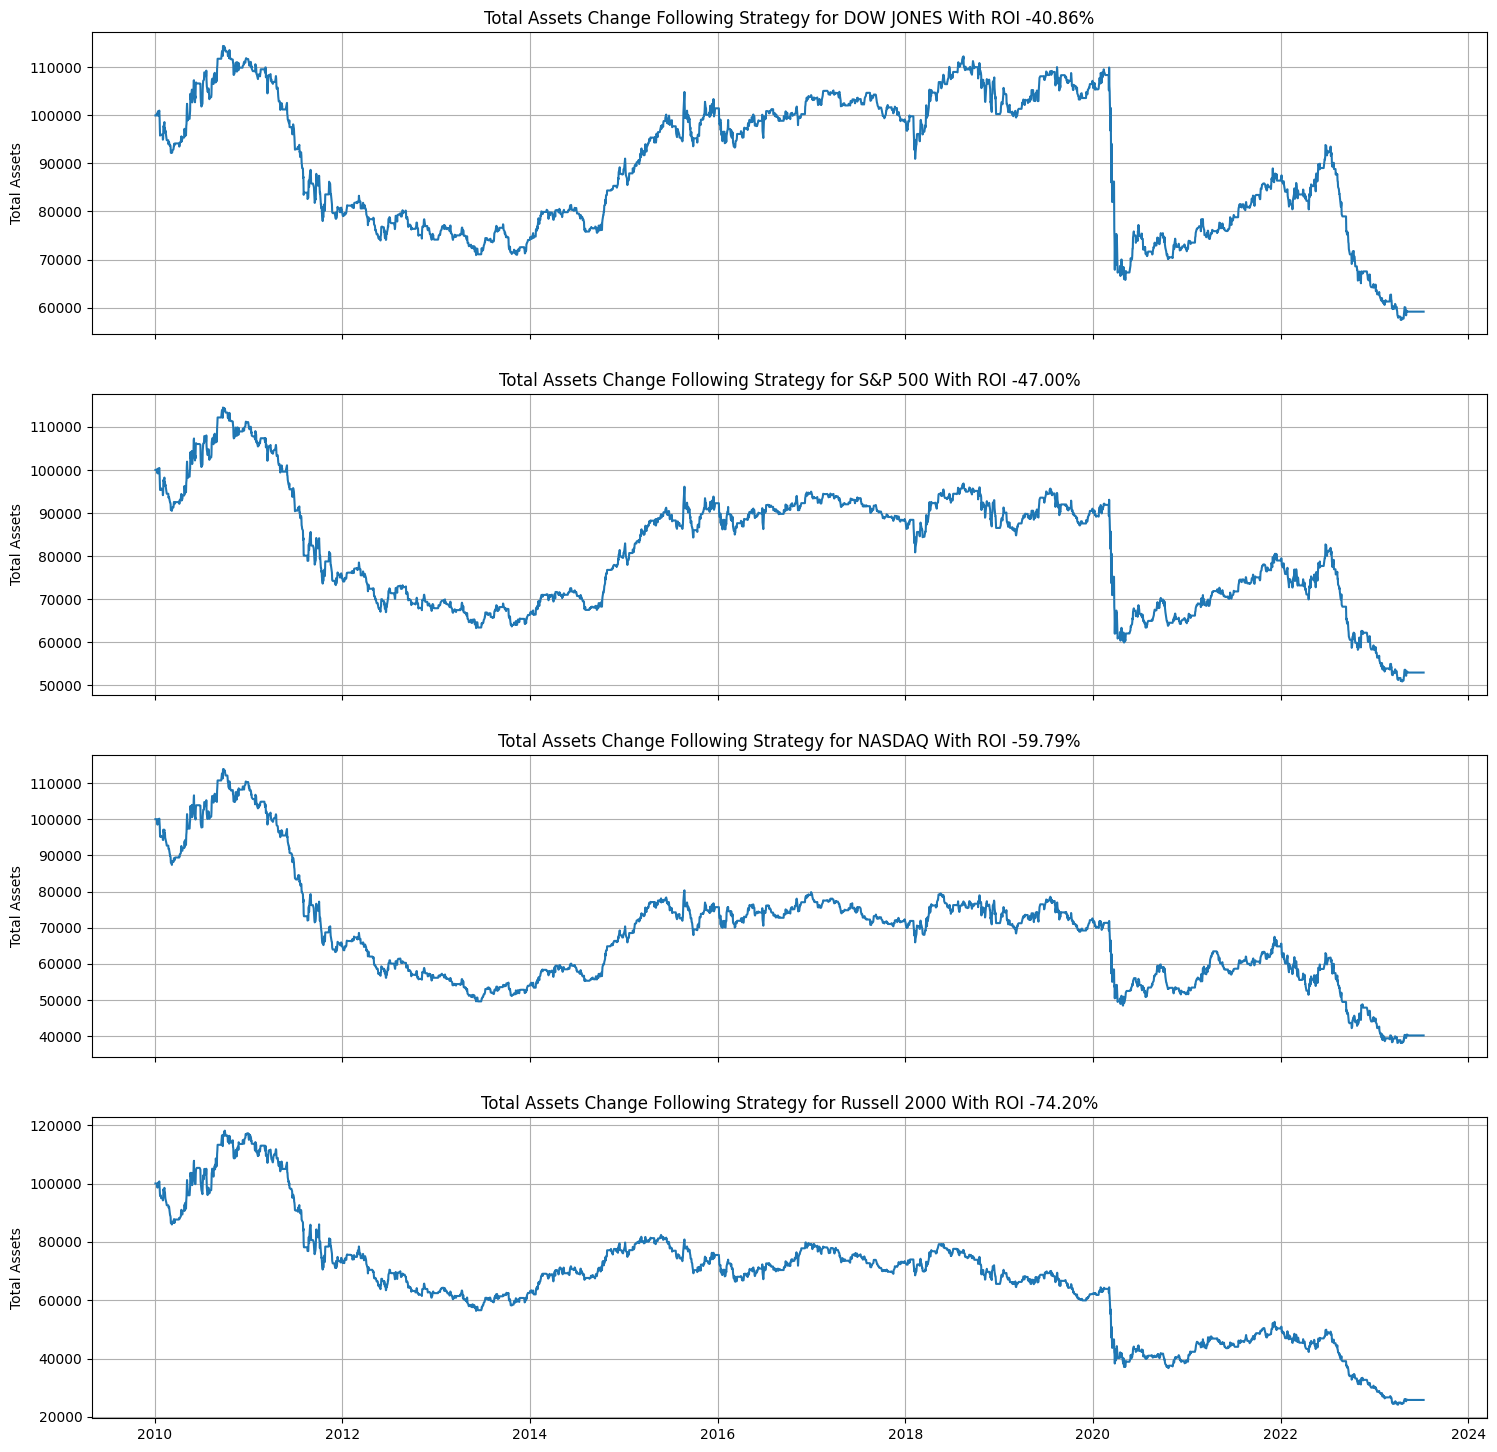

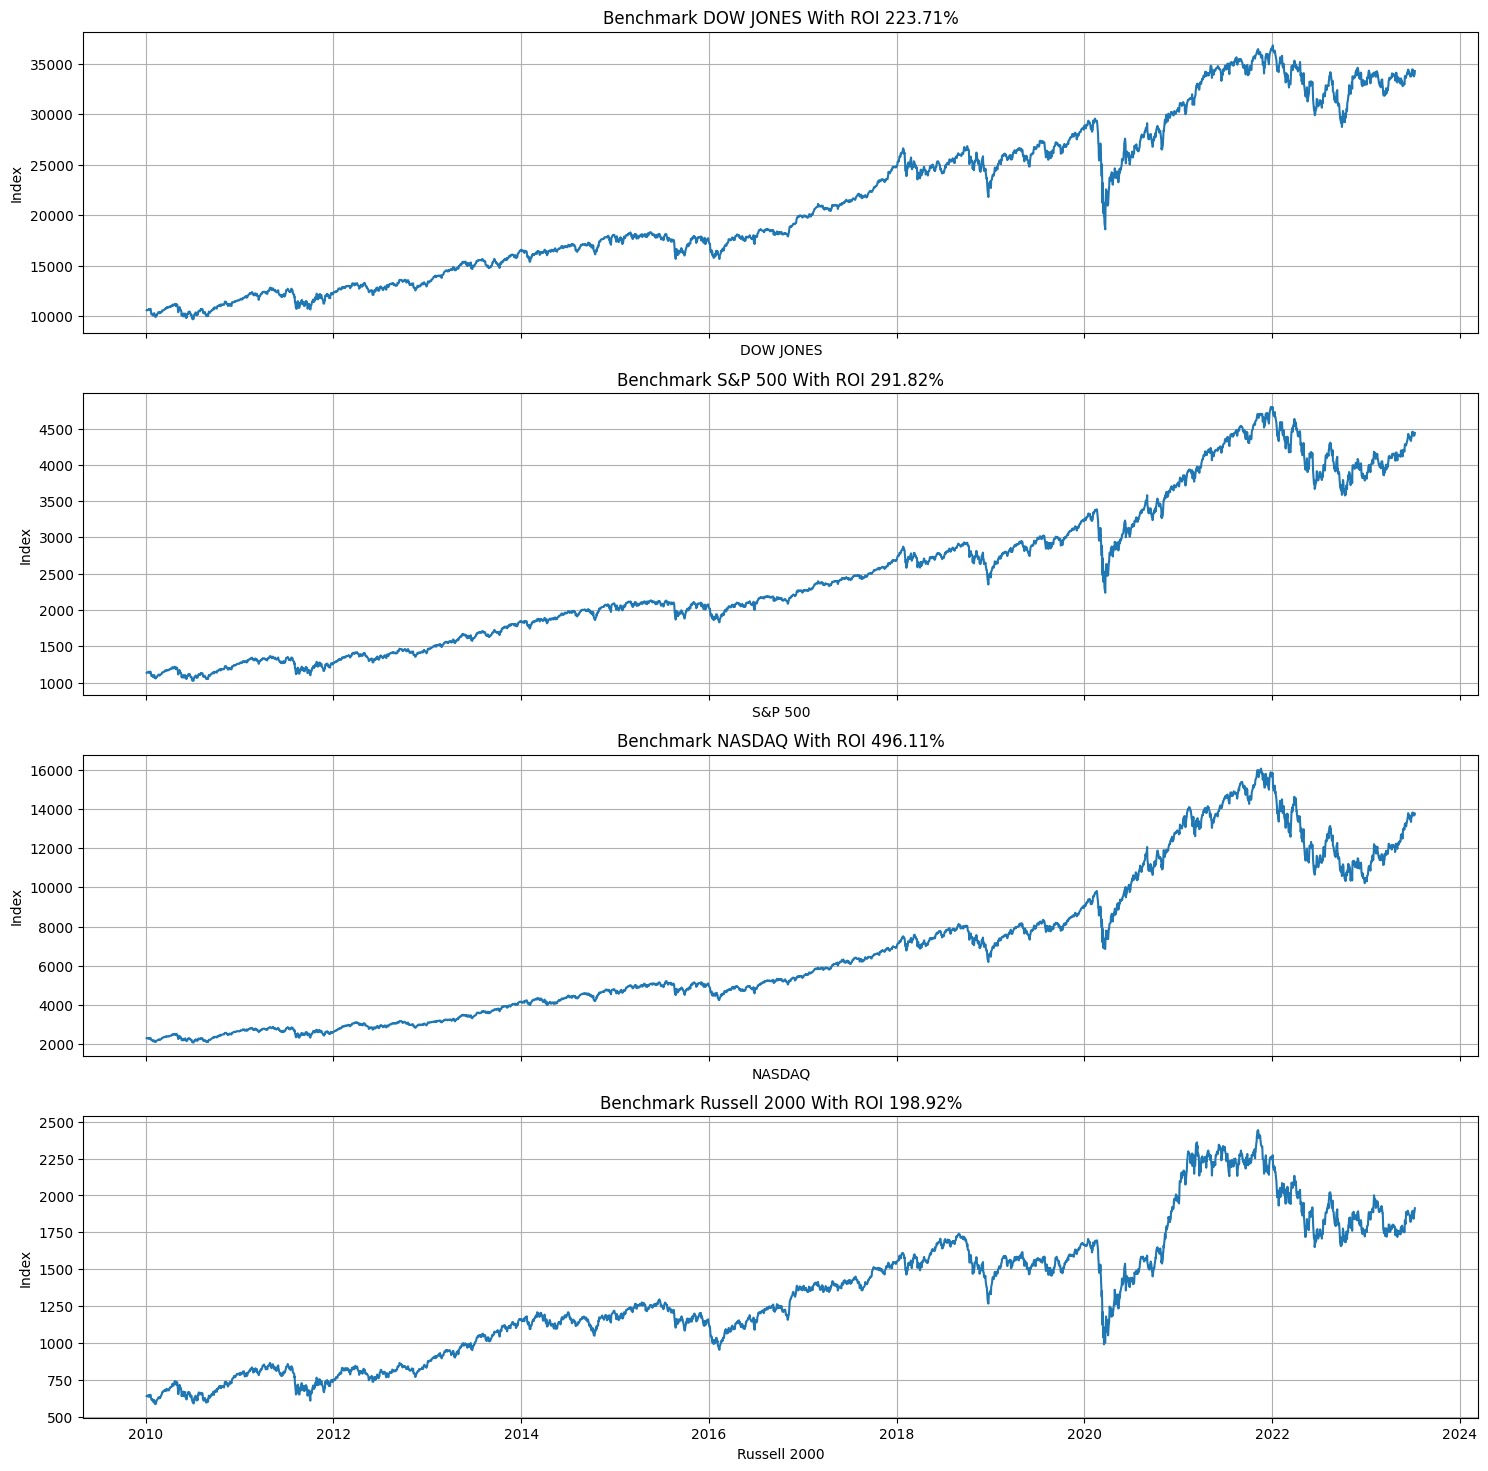

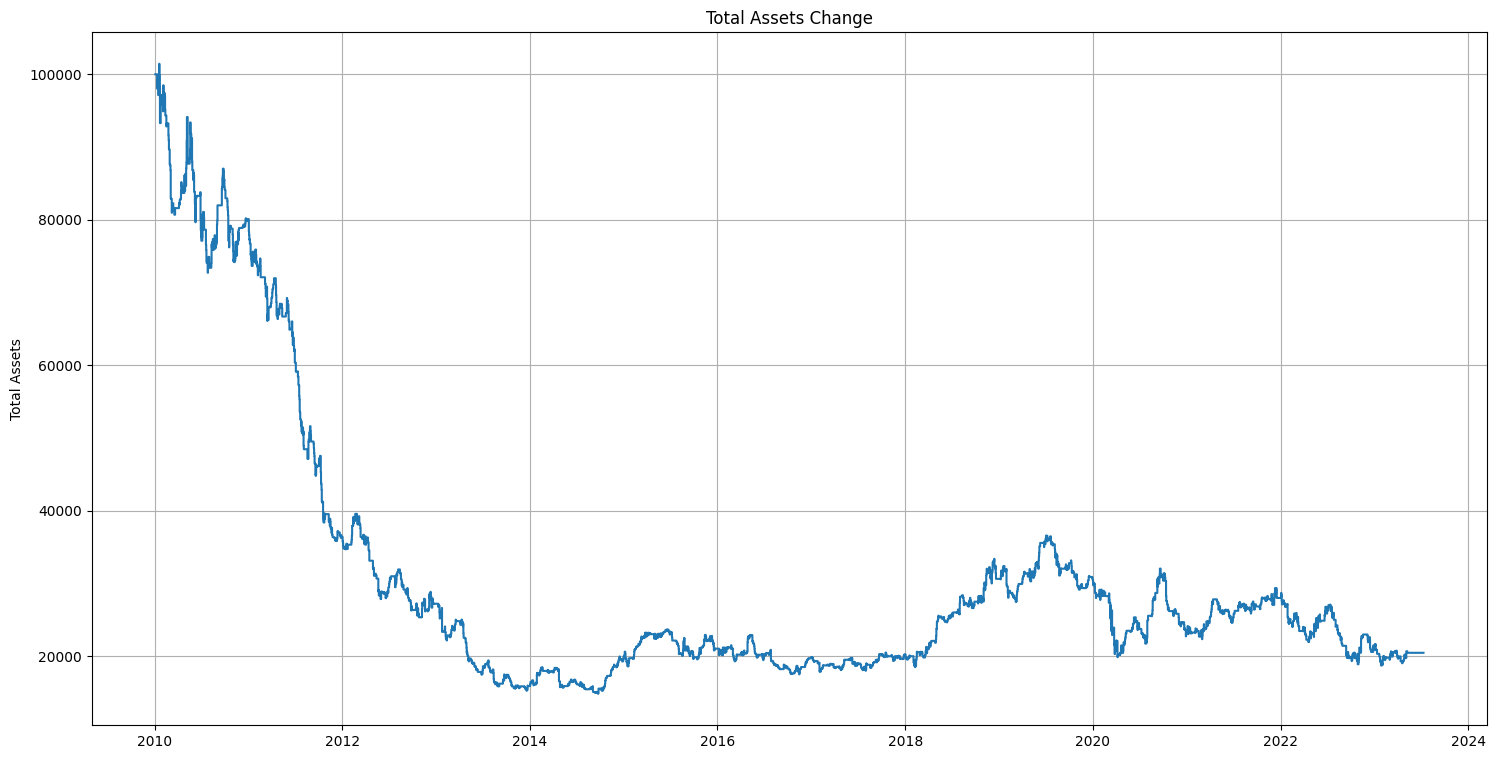

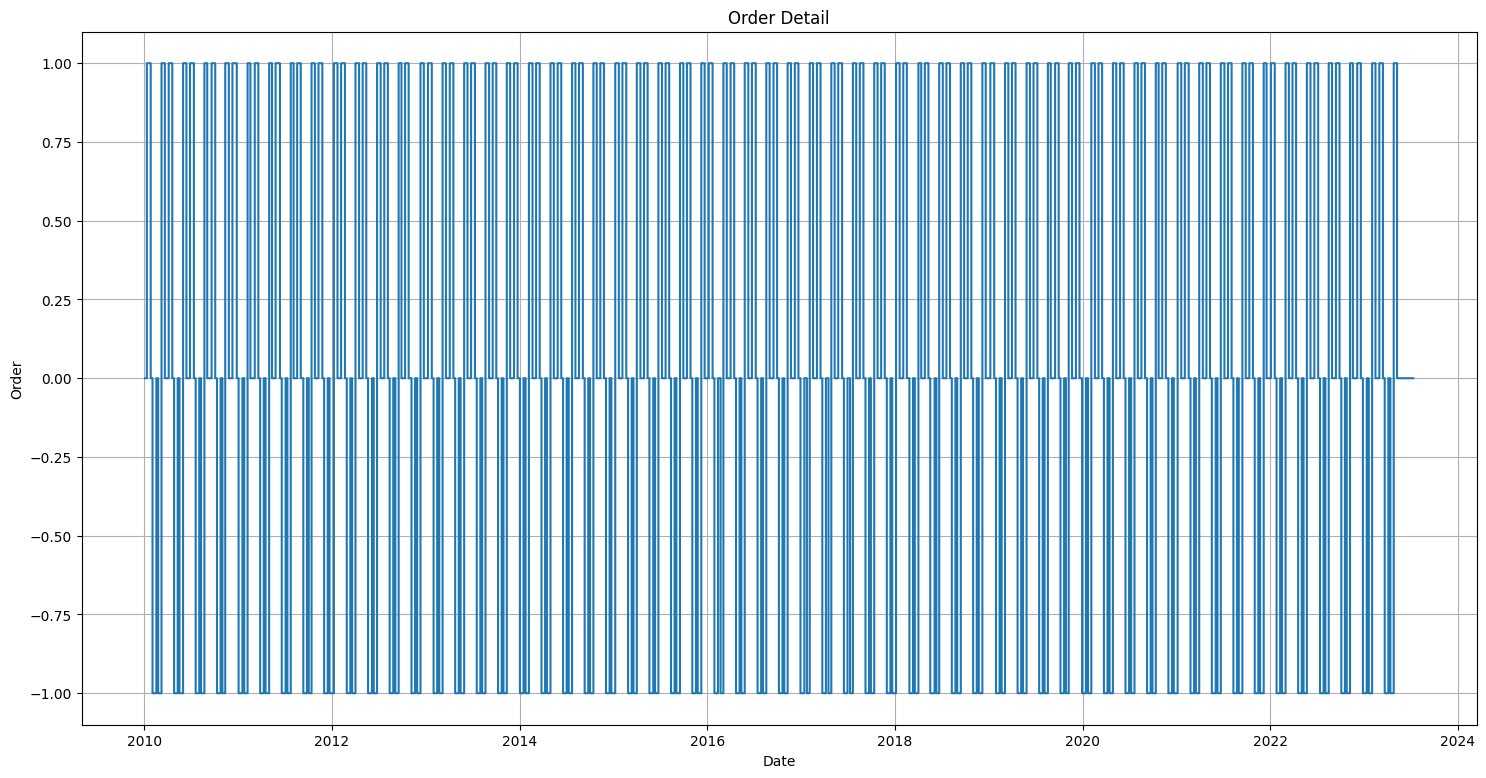

In [6]:
eval(stock)